# Classification d'images avec un réseau de neurones sous PyTorch


Dans ce projet, nous allons aborder la classification d'images en utilisant des réseaux de neurones avec PyTorch. L'objectif est de développer un modèle capable de reconnaître et de classer différentes catégories d'images. En suivant ce processus, nous allons acquérir une compréhension theorique et pratique des concepts fondamentaux du Deep Learnig.

## Explorations

In [72]:
####################################################
import torch #######################################
import torchvision #################################
import torchvision.transforms as transforms ########
import matplotlib.pyplot as plt ####################
import numpy as np #################################
####################################################

# definition de la fonction transform
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), ( 0.5))])  
# on travaille avec des tensors donc on doit les normaliser pour rester dans [0,1]

batch_size = 5 # correspond au choix de la taille du tirage d'ech aleatoire dans MNIST

trainset = torchvision.datasets. MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)    
# trainloader permet d'itterer les données facilement (batchs)

testset = torchvision.datasets. MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2) 

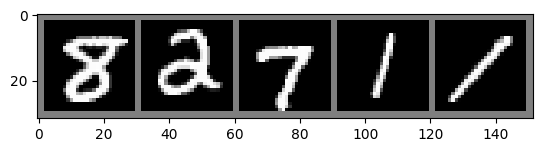

8     2     7     1     1    


In [73]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
classes = ["0","1","2","3","4","5","6","7","8","9"]
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [85]:
print(images.shape) 
print(trainset)
print(testset)
print('nbres d''images par classes dans trainset par ordre =',trainset.targets.bincount())
print('nbres d''images par classes dans testset par ordre =',  testset.targets.bincount())

torch.Size([5, 1, 28, 28])
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )
nbres dimages par classes dans trainset par ordre = tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])
nbres dimages par classes dans testset par ordre = tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])


# Réseau de neurones convolutionnel (CNN)

Un **CNN** est un type de modèle utilisé principalement pour la classification d'images. Il fonctionne en appliquant des filtres pour extraire des caractéristiques importantes des images, ce qui permet au modèle de reconnaître et de classer efficacement différents objets ou motifs.

On souhaite définir un CNN qui s'applique aux images de `MNIST`et effectue la suite d'opérations suivante :

**Partie CNN :** 
 * Une convolution 2D de noyau de taille 5x5 avec 16 canaux en sortie, suivie d'une activation  ReLU.
 * Un max-pooling 2D de taille 2x2
 * Une convolution 2D de noyau de taille 5x5 avec 32 canaux en sortie, suivie d'une activation  ReLU.
 * Un max-pooling 2D de taille 2x2
 
**Partie linéaire :**
 * Une couche linéaire finale permettant la classification.




Etant donnée un batch `x` (dont on précisera les dimensions) en entrée du CNN, expliciter les dimensions des tenseurs en entrée et en sortie de chacune des couches successives du réseau. On prendra soin de préciser les opérations nécessaires pour passer de la partie CNN à la partie linéaire.

**NB : Les modifications n'ont pas d'influences sur le nombre de canaux de sortie.**

Pour un input de taille **(1,28,28)**, une convolution 2D de noyau de taille 5x5, on retient : 
- Le nombre de canaux qui est **1** ici, 
- la taille du noyau **5** et 
- le nombre de canaux de sortie souhaité , ici  **16**. 

Donc la première convolution est faite sur**(1, 16, 5)**.

Avec une 2e convolution suivant les indications annoncées, on le fera sur  **(16, 32, 5)**.

**Ensuite**, pour faire la couche linéaire, il est nécessaire de connaitre le nombre de pixels après la deuxième convolution. Ainsi, on va d'écrire le procédé comme suit avec toutes les opérations :

**La premiere convolution** modifie la sortie en affectant la taille des pixels. 

    5=2*2+1 donc on a comme sortie (16,28-4,28-4)=(16,24,24) suivie d'une activation Relu.


**Un max-pooling 2D de taille 2x2** : 

- La taille de l'image est divisée par 2 de la façon suivante, (16,24/2,24/2)=(16,12,12) suivie une Relu. 
- Par la suite, en lui faisant subir la 2ᵉ convolution, le principe appliqué en 1 conduit à l'obtention de (32,8,8)


**Enfin**, en lui faisant subir un 2e max-pooling 2D de taille 2x2, on obtient la taille finale **(32,4,4)** et comme on a 10 classes, la couche sera appliquée à 

**(32x4x4, 10).**
 

Définir une class `CNNet` qui implémente le modèle décrit ci-dessus.

Définir un réseau cnnet = CNNet() et tester sa fonction `forward` sur un batch du `trainset`.

Afficher quel est le nombre de paramètres du réseau.

In [75]:
import torch.nn as nn
import torch.nn.functional as F

class CNNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32*4*4, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        return x

cnnet = CNNet()

# Entraînement du réseau

C’est là que les choses commencent à devenir intéressantes.
Nous devons simplement faire une boucle sur notre itérateur de données, et alimenter les entrées à la réseau et optimiser.


In [76]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()   
optimizer = optim.SGD(cnnet.parameters(), lr=0.001, momentum=0.9) 

In [77]:
import time
start = time.time()
for epoch in range(10):  
    running_loss = 0.0 # 
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = cnnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

end = time.time()
elapsed = end - start

print(f'Temps d\'exécution : {elapsed:.2}ms')

[1,  2000] loss: 0.751
[1,  4000] loss: 0.355
[1,  6000] loss: 0.330
[1,  8000] loss: 0.309
[1, 10000] loss: 0.314
[1, 12000] loss: 0.294
[2,  2000] loss: 0.275
[2,  4000] loss: 0.282
[2,  6000] loss: 0.285
[2,  8000] loss: 0.194
[2, 10000] loss: 0.062
[2, 12000] loss: 0.057
[3,  2000] loss: 0.042
[3,  4000] loss: 0.045
[3,  6000] loss: 0.041
[3,  8000] loss: 0.040
[3, 10000] loss: 0.048
[3, 12000] loss: 0.043
[4,  2000] loss: 0.035
[4,  4000] loss: 0.034
[4,  6000] loss: 0.033
[4,  8000] loss: 0.035
[4, 10000] loss: 0.036
[4, 12000] loss: 0.031
[5,  2000] loss: 0.025
[5,  4000] loss: 0.027
[5,  6000] loss: 0.030
[5,  8000] loss: 0.031
[5, 10000] loss: 0.025
[5, 12000] loss: 0.033
[6,  2000] loss: 0.022
[6,  4000] loss: 0.023
[6,  6000] loss: 0.024
[6,  8000] loss: 0.024
[6, 10000] loss: 0.025
[6, 12000] loss: 0.022
[7,  2000] loss: 0.016
[7,  4000] loss: 0.021
[7,  6000] loss: 0.021
[7,  8000] loss: 0.020
[7, 10000] loss: 0.018
[7, 12000] loss: 0.025
[8,  2000] loss: 0.017
[8,  4000] 

D'une première couche de neurones (unités) : chaque unité correspond à une des variables d'entrée. On peut rajouter une unité de biais qui est toujours activée (elle transmet 1 quelles que soient les données).

Ces unités sont reliées à une seule et unique unité de sortie (dans le cas d'un perceptron), qui reçoit la somme des unités qui lui sont reliées, pondérée par des poids de connexion.

Pour p variables $ x_1,x_2,…,x_p,$ la sortie reçoit donc $ w_0 + \sum_{j=1}^p(w_j x_j) $ . L'unité de sortie applique alors une fonction d'activation a à cette sortie. 

Un reseau prédit ainsi grâce à une fonction de décision f définie par $f(x)$=$a( w_0 + \sum_{j=1}^p(w_j x_j) ) $. Cette fonction a une forme explicite, il s'agit bien d'un modèle paramétrique.

A l'aide des fonctions de ```sklearn```, nous allons évaluer la performance du réseau entraîné (rapport de classification et matrice de confusion).

In [22]:
all_labels = torch.tensor([])
all_predicted = torch.tensor([])
with torch.no_grad():
    for data in testloader:  
        images, labels = data
        outputs = cnnet(images)        
        _, predicted = torch.max(outputs.data, 1)

        all_labels = torch.cat((all_labels, labels))
        all_predicted = torch.cat((all_predicted, predicted)) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



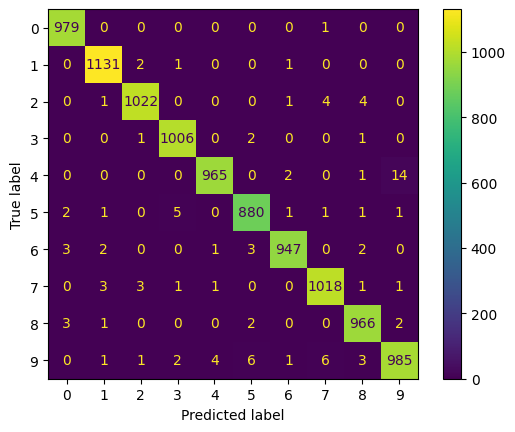

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

t_test = all_labels 
t_pred = all_predicted

#Classification report
print(classification_report(t_test,t_pred,target_names = classes))
#Confusion matrix
cm = confusion_matrix(t_test,t_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = classes)
disp.plot()

On a de bonnes précisions d'environ 99% donc on peut dire que notre réseau est bien entrainé. Mais aussi notre matrice confirme l'efficacité de notre réseau, car on ne perçoit pas beaucoup d'erreurs comme nous pouvons le voir sur la diagonale principale.

## Comparaison avec un réseau à une couche cachée

Pour finir nous allons comparer la performance du réseau CNN avec un réseau simple à une seule couche cachée.

On va utiliser l'architecture suivante : 

* Une couche linéaire avec dimension de sortie 100, suivie d'une activation  ReLU.
* Une couche linéaire finale permettant la classification.

Dans cette partie, nous allons : 

- Définir une class `MLP` qui implémente le modèle décrit ci-dessus.
- Définir un réseau mlp = MLP() et tester sa fonction `forward` sur un batch du `trainset`et enfin
- Afficher le nombre de paramètres du réseau `mlp`.

In [84]:
import torch.nn as nn
import torch.nn.functional as F

class MLP (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 100) 
        self.fc2 = nn.Linear(100, 10) # 10 est le nombre de classes 
    def forward(self, x):
      
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
mlp = MLP()

In [69]:
# Pour le nombre de paramétre du réseaux.
params = list(mlp.parameters())
print(len(params))
print(params[0].size())  

4
torch.Size([100, 784])


# Entraînement du réseau `mlp` et évaluation de sa performance.

In [80]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()  # calcul du log de vraisemblance 
optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9) # calcul du gradient stochastique 

In [81]:
import time
start = time.time()

for epoch in range(10):   
    running_loss = 0.0 
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = mlp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

end = time.time()
elapsed = end - start

print(f'Temps d\'exécution : {elapsed:.2}m')

[1,  2000] loss: 0.669
[1,  4000] loss: 0.370
[1,  6000] loss: 0.317
[1,  8000] loss: 0.289
[1, 10000] loss: 0.252
[1, 12000] loss: 0.233
[2,  2000] loss: 0.206
[2,  4000] loss: 0.191
[2,  6000] loss: 0.179
[2,  8000] loss: 0.159
[2, 10000] loss: 0.161
[2, 12000] loss: 0.152
[3,  2000] loss: 0.136
[3,  4000] loss: 0.128
[3,  6000] loss: 0.133
[3,  8000] loss: 0.134
[3, 10000] loss: 0.129
[3, 12000] loss: 0.121
[4,  2000] loss: 0.108
[4,  4000] loss: 0.112
[4,  6000] loss: 0.108
[4,  8000] loss: 0.113
[4, 10000] loss: 0.102
[4, 12000] loss: 0.101
[5,  2000] loss: 0.091
[5,  4000] loss: 0.090
[5,  6000] loss: 0.093
[5,  8000] loss: 0.103
[5, 10000] loss: 0.083
[5, 12000] loss: 0.085
[6,  2000] loss: 0.082
[6,  4000] loss: 0.085
[6,  6000] loss: 0.083
[6,  8000] loss: 0.084
[6, 10000] loss: 0.073
[6, 12000] loss: 0.081
[7,  2000] loss: 0.071
[7,  4000] loss: 0.075
[7,  6000] loss: 0.070
[7,  8000] loss: 0.079
[7, 10000] loss: 0.067
[7, 12000] loss: 0.074
[8,  2000] loss: 0.064
[8,  4000] 

# Application de MLP

In [82]:
all_labels = torch.tensor([])
all_predicted = torch.tensor([])
with torch.no_grad():
    for data in testloader:   
        images, labels = data
        outputs = mlp(images)        
        _, predicted = torch.max(outputs.data, 1)

        all_labels = torch.cat((all_labels, labels)) 
        all_predicted = torch.cat((all_predicted, predicted)) 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.94      0.97       982
           5       0.98      0.96      0.97       892
           6       0.93      0.99      0.96       958
           7       0.96      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



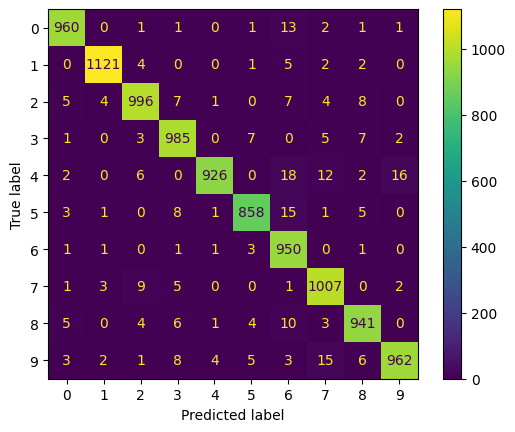

In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

t_test = all_labels 
t_pred = all_predicted

#Classification report
print(classification_report(t_test,t_pred,target_names = classes))

#Confusion matrix
cm = confusion_matrix(t_test,t_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = classes)
disp.plot()

Comparer au premier réseau, il est moins efficace en terme de classiffication et prend moins de temps pour s'executer. 
Cela est peut etre du par le fait qu'on a pas de convolution ni de max pooling pour ce dernier. Ainsi, on peut bien avoir un probléme comme le gradient qui s'annule plus fréquament ...

# CONCLUSION :

Les réseaux de neurones à propagation avant, ou perceptrons multicouches (MLP), sont constitués d'une couche d'entrée, d'une ou plusieurs couches cachées et d'une couche de sortie. Si ces réseaux de neurones sont aussi communément appelés MLP, il est important de noter qu'ils sont en fait composés de neurones sigmoïdes, et non pas de perceptrons, car la plupart des problèmes du monde réel sont non linéaires. Les données sont généralement introduites dans ces modèles pour les entraîner, et ils constituent la base de la vision par ordinateur, du traitement du langage naturel et d'autres réseaux de neurones.
En fait, ils s'appuient sur des données d'entraînement pour apprendre et améliorer leur précision au fil du temps. Cependant, une fois que ces algorithmes d'apprentissage sont réglés avec précision, ils constituent des outils puissants en informatique et en intelligence artificielle, nous permettant de classer et de regrouper des données à une vitesse élevée. Les tâches de reconnaissance vocale ou de reconnaissance d'images peuvent prendre quelques minutes plutôt que des heures par rapport à l'identification manuelle par des experts humains. L'un des réseaux de neurones les plus connus est l'algorithme de recherche de Google.
Déjà à l’heure actuelle, GPT-4 est suffisamment avancé pour réussir haut la main l’évaluation de l’École du Barreau et plusieurs entreprises de comptabilité utilisent ChatGPT. En parallèle, les entreprises comme OpenAI, Google et Meta construisent des systèmes permettant de générer instantanément des images et des vidéos à partir d’une description textuelle. On peut citer pour exemple DALL-E et MidJourney. D’autres entreprises créent des robots capables d’utiliser un site web ou une application comme un humain le fait. Les technologies d’intelligence artificielle actuelles sont basées sur des « réseaux de neurones » basés sur la façon dont le cerveau humain fonctionne.
Toutefois, nos cerveaux sont beaucoup plus efficaces et compliqués. C’est ce qui leur confère des capacités dont l’IA est dépourvue comme l’imagination, l’inventivité ou la créativité. Même si les réseaux de neurones sont passés de quelques millions de paramètres à plus de 200 milliards, les systèmes d’intelligence artificielle restent de simples machines dénuées de conscience.


En somme, si on regarde la conception d'un réseau, on croit que les choses sont simples alors que derrière, ce sont des tas de choses importants et pas faciles à manipuler qui s'y cachent. Et à ce stade, on peut parler du Loss, du cross-entropy venant de la log likelihood, des coûts à maximiser, de la descente de gradient, etc. 

Ce projet m'a permis de découvrir un nouvel environnement qui a éveillé ma curiosité sur le changement du monde par un développement avancé de cette technologie, mais également beaucoup ouvert les yeux sur mon orientation professionnelle. 

# References :

https://www.ibm.com/fr-fr/topics/neural-networks \\\
https://www.lebigdata.fr/futur-ia-dossier \\\
https://openclassrooms.com/fr/courses/4470406-utilisez-des-modeles-supervises-non-lineaires/4730716-entrainez-un-reseau-de-neurones-simple